In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
# convert job_skills STR type to LIST type
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 1. Top 5 skills for Data Analyst by month

In [4]:
df['job_posted_month'] = df.job_posted_date.dt.to_period('M')

In [5]:
#Extract dataframe based on the job title = 'Data Analyst'
job_title = 'Data Analyst'
df_DA = df[df.job_title_short == job_title].copy()

In [6]:
# Create a new data frame after df.explode()
df_DA_explode = df_DA.explode('job_skills')

In [7]:
# Create pivot table, replace missing values with 0 if any

df_pivot = df_DA_explode.pivot_table(index = 'job_posted_month', columns= 'job_skills', aggfunc= 'size', fill_value=0)

In [51]:
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2023-02,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
2023-03,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
2023-04,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
2023-05,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
2023-06,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
2023-07,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
2023-08,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
2023-09,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [12]:
# Create a total row to identify top skills
df_pivot.loc['total'] = df_pivot.sum()

# Sort column
df_pivot.loc['total'].sort_values(ascending= False).index

# Select columns from the data Frame based on the sorted list
df_pivot_final = df_pivot[df_pivot.loc['total'].sort_values(ascending= False).index]

In [14]:
# Drop 'Total':
df_pivot_final = df_pivot_final.drop('total')

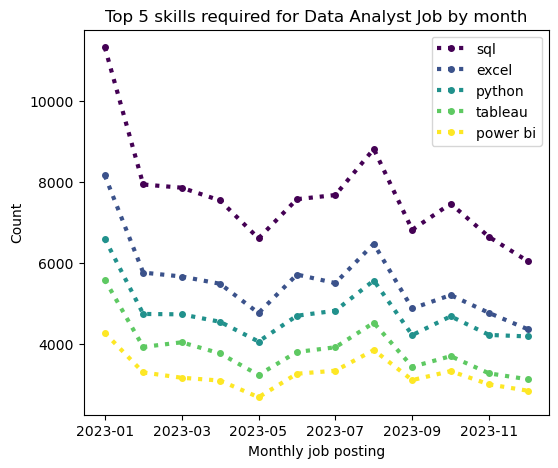

In [24]:
# Based on data Frame above, plot first 5 columns (top 5 skills)

df_pivot_final.iloc[:, 0:5].plot(
    kind = 'line', linewidth = 3,
    linestyle = ':',  #Other options: '-', '--', '-.' matplotlib cheatsheet
    colormap = 'viridis',  #Other options: matplotlib cheatsheet
    marker = 'o',
    markersize = 4,
    figsize=(6,5)   #the dimension of the plot (eg: 6x5)
    )
plt.title('Top 5 skills required for Data Analyst Job by month')
plt.xlabel('Monthly job posting')
plt.legend()
plt.ylabel('Count')
plt.show()

## 2. Job counts vs Median salary for top skills

In [27]:
df_median_count_skill = df_DA_explode.groupby(['job_skills']).agg(
    skill_counts = ('job_skills', 'count'),
    median_year_salary = ('salary_year_avg', 'median')
)

top_skills = 20
df_median_count_skill = df_median_count_skill.sort_values(by = 'skill_counts', ascending=False).head(top_skills)
df_median_count_skill

,skill_counts,median_year_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


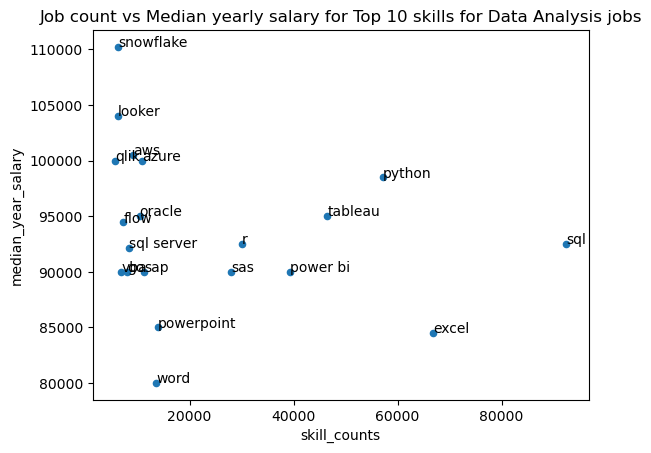

In [28]:
df_median_count_skill.plot(kind = 'scatter', x = 'skill_counts', y = 'median_year_salary')
plt.title('Job count vs Median yearly salary for Top 10 skills for Data Analysis jobs')
for i, txt in enumerate(df_median_count_skill.index):
    plt.text(df_median_count_skill['skill_counts'].iloc[i], df_median_count_skill['median_year_salary'].iloc[i],txt)

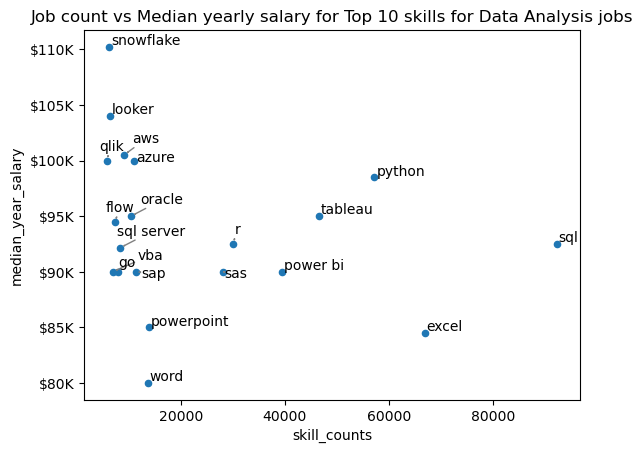

In [47]:
# Formatting the text inside the scatter plot

from adjustText import adjust_text

df_median_count_skill.plot(kind = 'scatter', x = 'skill_counts', y = 'median_year_salary')
plt.title('Job count vs Median yearly salary for Top 10 skills for Data Analysis jobs')
# Creating a variable to use in adjust_text later:
texts = []

for i, txt in enumerate(df_median_count_skill.index):
    texts.append(plt.text(df_median_count_skill['skill_counts'].iloc[i], df_median_count_skill['median_year_salary'].iloc[i],txt)) # Getting the text value into the variable:

adjust_text(
    texts,
    arrowprops = dict(arrowstyle = "->", color = 'grey', lw=1)
    )

# Get current axis to use ax.yaxis.set_major_formatter (to modify the ylabel)
ax = plt.gca() 
# Apply the plt.FuncFormatter(x, pos) to format the y axis value
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))                                                       
plt.show()